# Demo for burst detections

Thi notebook aims to generate a signal with known beta burst components and to apply the threshold simple (THS) detection method.



# Definitions


In [ ]:
# -------------------------------
# Define path
Ruta            = "/content/drive/My Drive/00_JMAO/11_PROJECTS/Project_BetaBurst/Code/"


# Import libraries

In [ ]:
# -------------------------------
# Install hmmlearn
%%capture
! pip install hmmlearn


In [ ]:
# -------------------------------
# Install mne
%%capture
! pip install mne


In [ ]:
# -------------------------------
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# -------------------------------
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------
# Insert the directory
import sys
sys.path.insert(0,Ruta)

# -------------------------------
# Import custom made functions
import ToolboxBurstsDetection as TBD


Mounted at /content/drive


# Generate signal

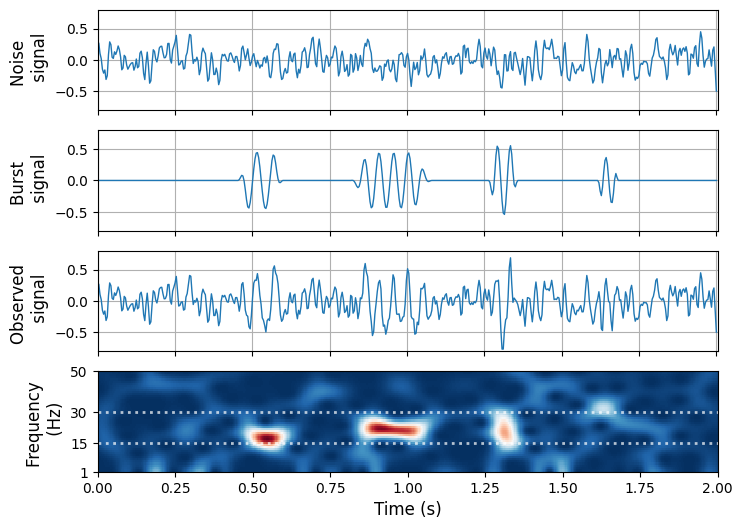

In [ ]:
# -------------------------------
# Set sampling frequency
fs                = 256

# -------------------------------
# Set signal duration
SignalDuration    = 2.0

# -------------------------------
# Generate a signal with burts components
xraw, t, _, _, _, _, _, _ = TBD.GenerateSignalWithBurstsV1(fs, SignalDuration, True )


In [ ]:
# -------------------------------
# Print signal information
print( type(xraw) )
print( xraw.shape )


<class 'numpy.ndarray'>
(512,)


# Threshold simple (THS) method

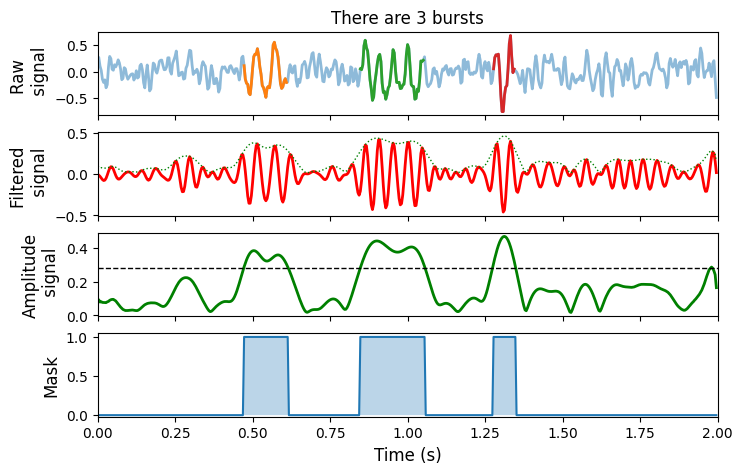

In [ ]:
# -------------------------------
# Define frequency band
FrequencyBand   = [15, 29]  # Hz

# -------------------------------
# Set parameters

# Factor-of-the-median threshold
THRFOM         = 2

# Minimum burst/segment duration (i.e., eliminate bursts/segments with duration lower than this)
MinSegDur      = 50 # ms

# Define 'Amplitude' or 'Power'
Method         = 'Amplitude'

# -------------------------------
# Burst detection using the THS method
maskTHS = TBD.BurstDetection_THS(xraw, fs, FrequencyBand, THRFOM, MinSegDur, Method, True)


There are:                3 bursts 
Burst rate:               1.5 burst/s 
 
Duration:                 [0.140625, 0.20703125, 0.0703125] s
Peak amplitude:           [0.37049964851956874, 0.4291601320091323, 0.45916562588448306] u
 
Peak frequency:           [18.0, 22.0, 20.0] Hz
Peak frequency magnitude: [0.046972728441289434, 0.0793436767044071, 0.028828823899945403]
 


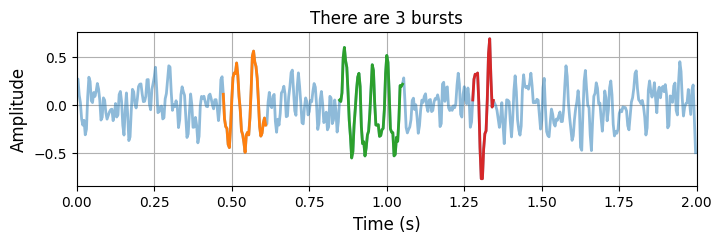

In [ ]:
# -------------------------------
# Compute characteristics
charsTHS, rateTHS, _, eventsTHS = TBD.ComputeBurstCharacteristicsFromMask(maskTHS, xraw, fs, FrequencyBand, True, True )
